## Import Libraries

All the libraries necessary for the execution of the processes are imported

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly
from plotly.offline import init_notebook_mode, iplot
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Data Extraction

The data is extracted from a csv file

In [2]:
data=pd.read_csv("mushrooms.csv")

Shows the first five rows of our dataset

In [3]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

Shows the last five rows of our dataset

In [4]:
data.tail()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[5 rows x 23 columns]

## Data Validation & Cleansing

All the columns of our dataset

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

No. of rows and columns in our dataset

In [6]:
data.shape

(8124, 23)

Generation of categorical data descriptives to summarize number of counts, number of unique values, top value and frequency of the top value.

In [7]:
data.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

Finding the unique values for the features

In [8]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

It is observed that veil-type has only one attribute, so it is droped since it has no significant value for our model

In [9]:
data.drop(['veil-type'], axis=1, inplace=True)

Check that the column is no longer in the data frame

In [10]:
data.shape

(8124, 22)

Find the missing values in our dataset

In [11]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Data Analysis and Data Visualization

Information about the column data types, memory usage, column labels and null values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

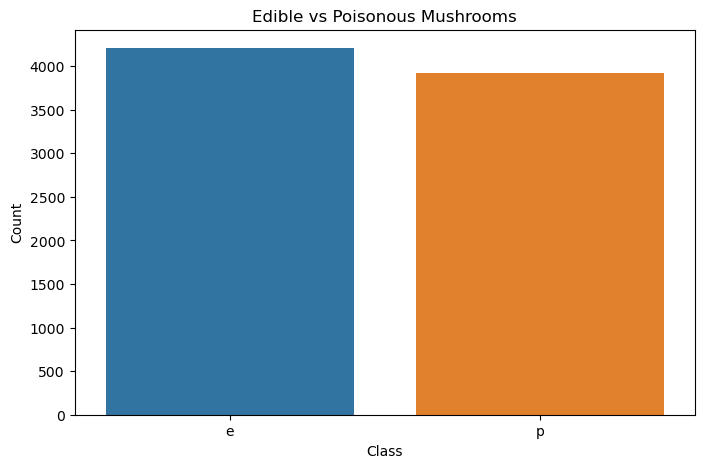

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['class'].value_counts().index, y=data['class'].value_counts().values)
plt.title('Edible vs Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

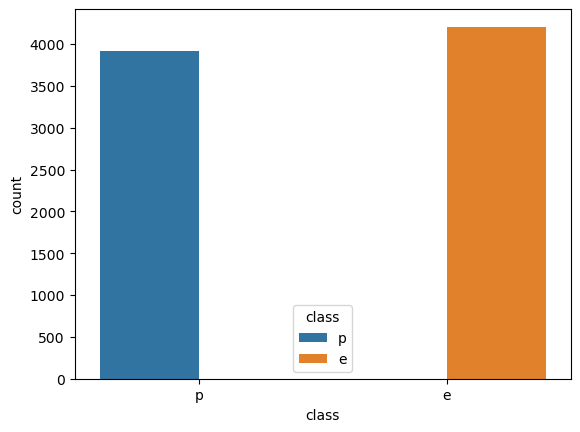

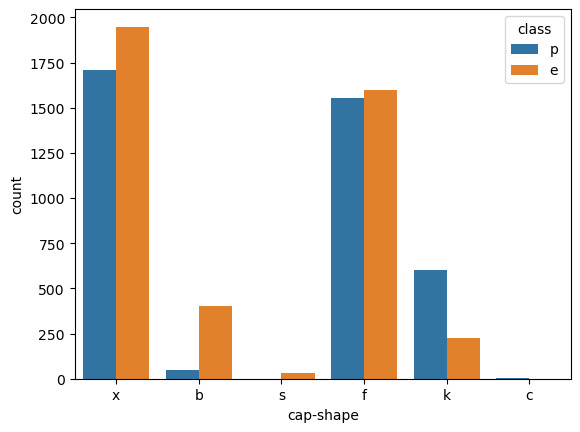

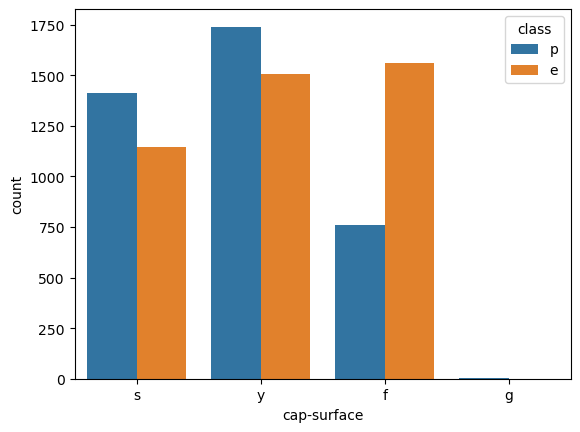

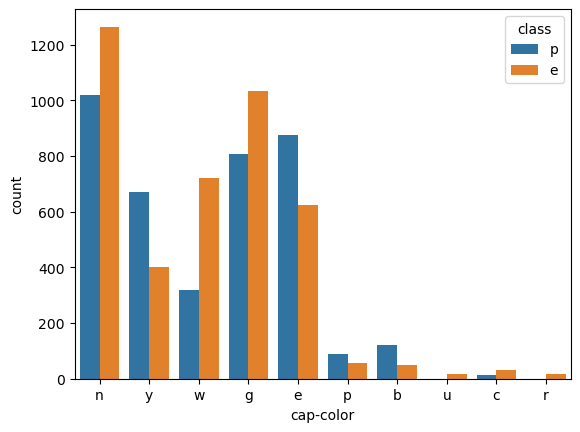

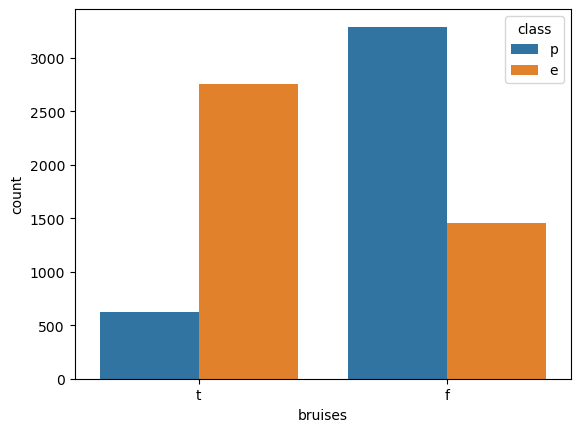

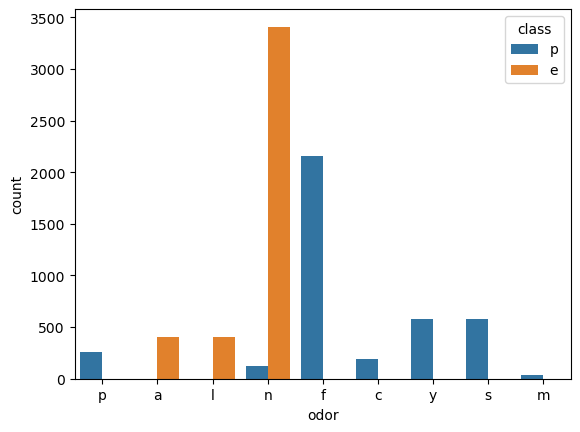

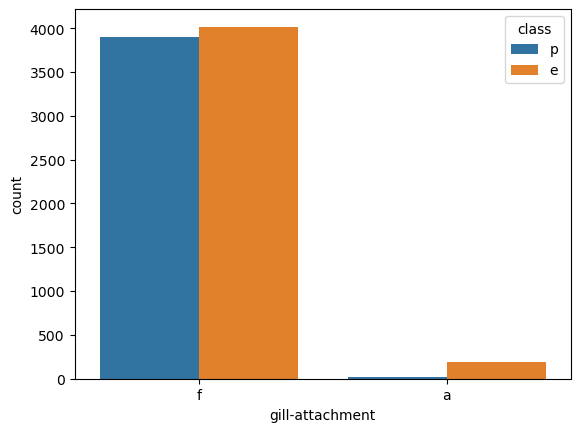

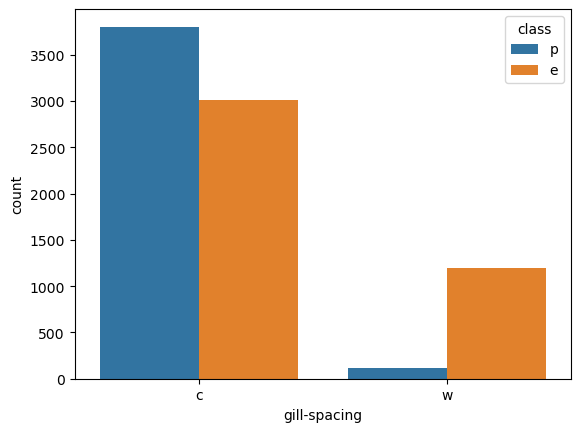

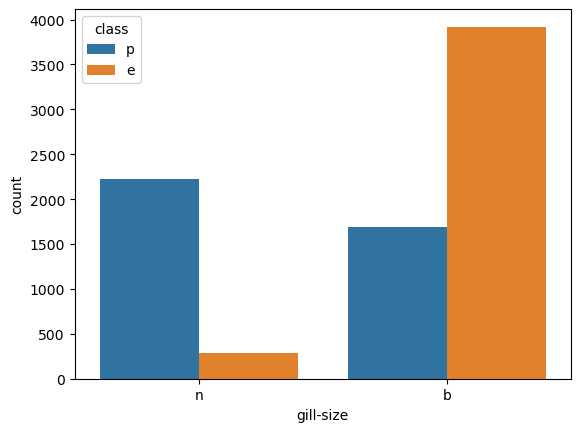

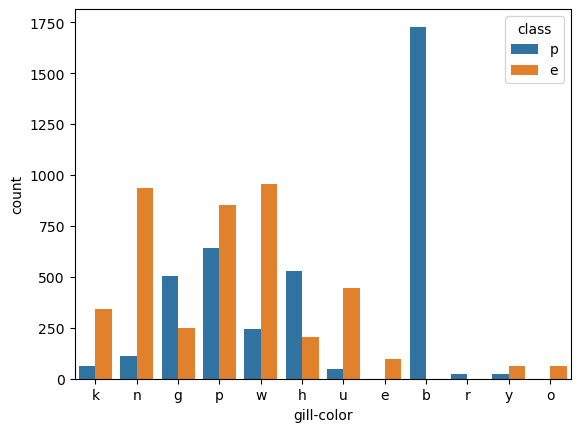

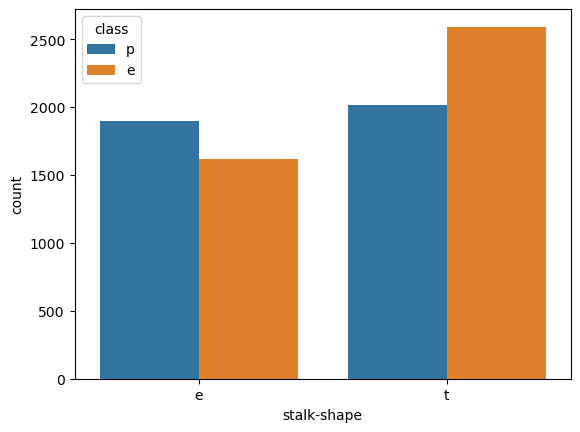

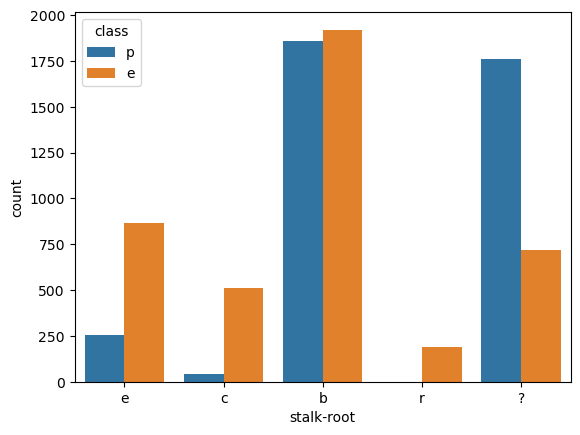

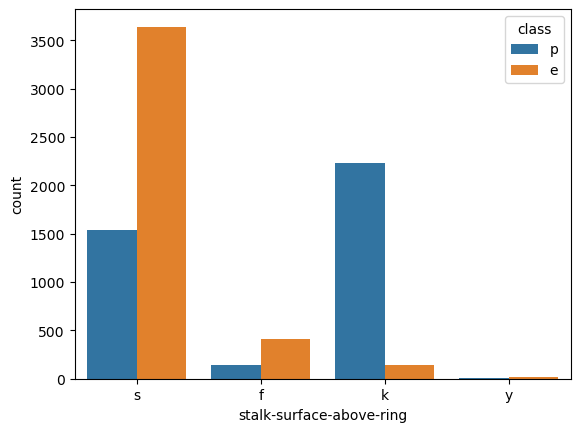

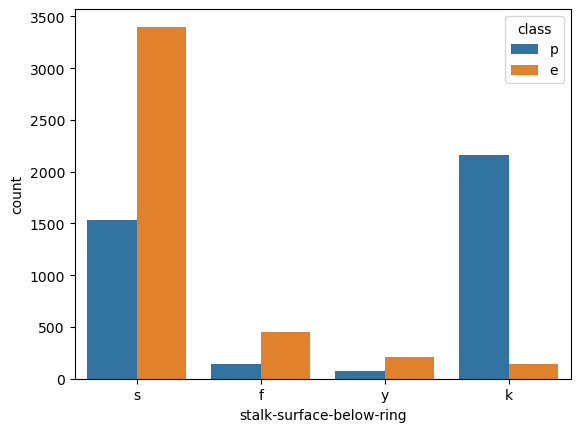

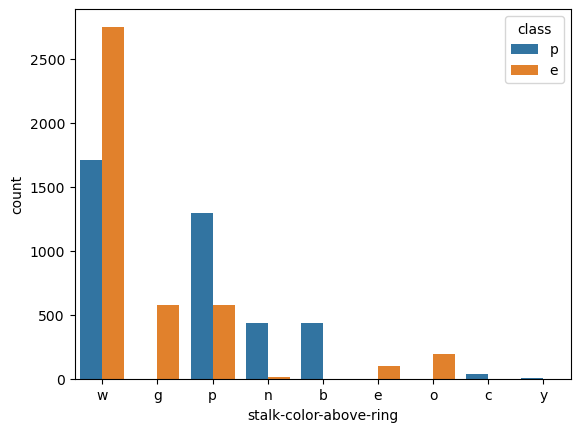

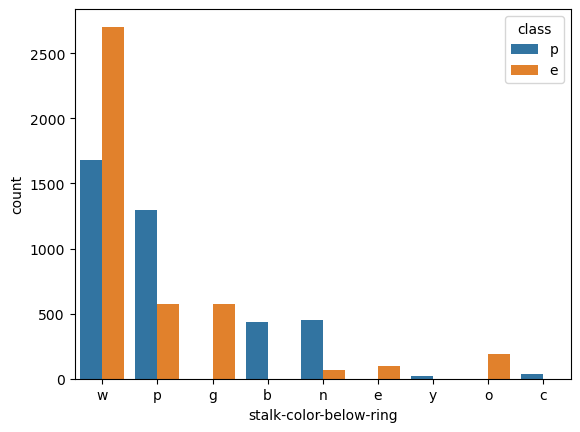

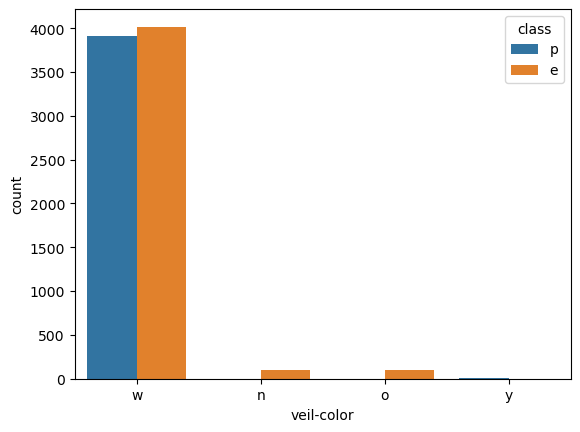

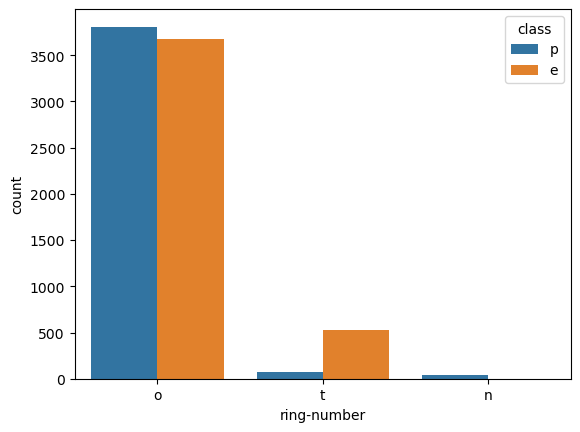

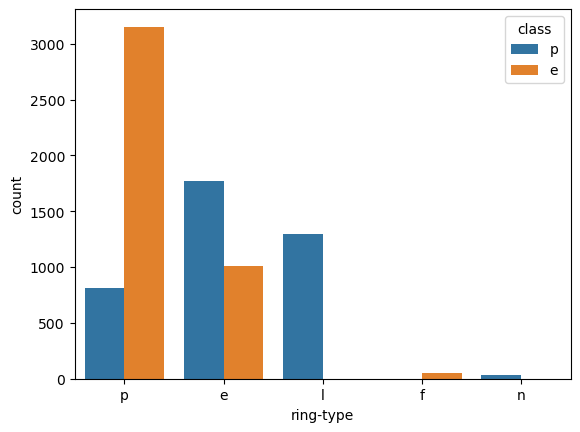

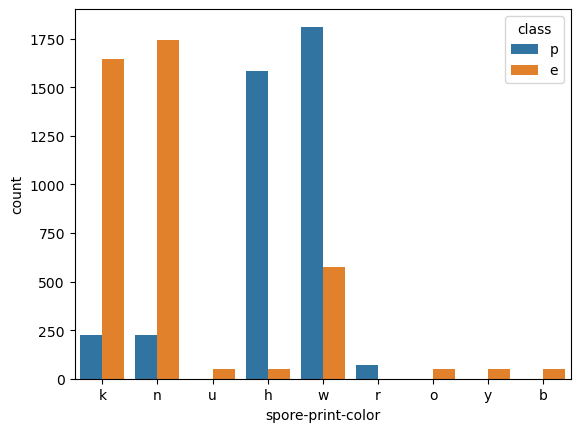

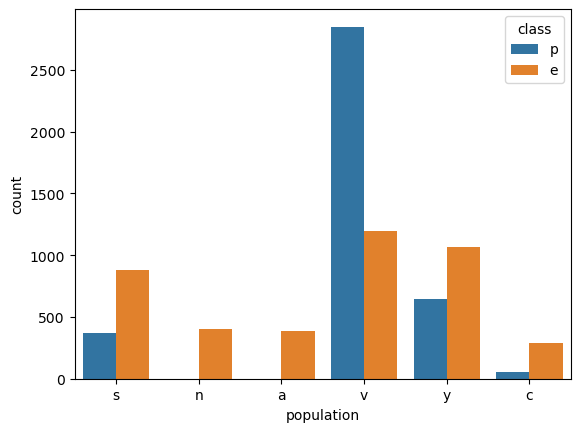

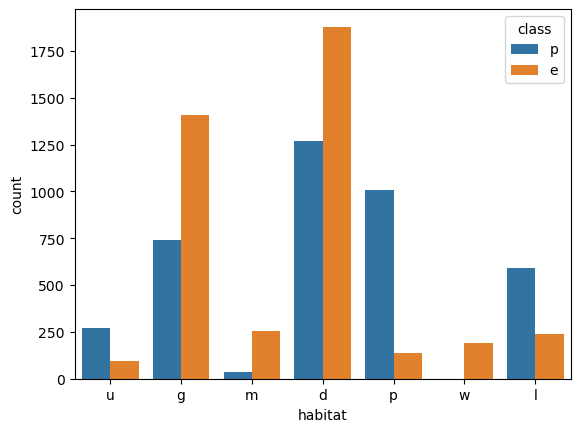

In [14]:
for column in data.columns:
    sns.countplot(x=column,hue ='class',data=data)
    plt.show()

In [15]:
data[['class','spore-print-color']].value_counts()

class  spore-print-color
p      w                    1812
e      n                    1744
       k                    1648
p      h                    1584
e      w                     576
p      k                     224
       n                     224
       r                      72
e      b                      48
       h                      48
       o                      48
       u                      48
       y                      48
dtype: int64

In [16]:
fig = {
  "data": [
    {
      "values": [1744,1648,576,48,48,48,48,48],
      "labels": ['Brown','Black','White','Orange',"Purple","Chocolate","Yellow","Buff"],
      "domain": {"column": 0},
      "name": "Edible Mushrooms",
      "hoverinfo":"label+percent+name",
      "type": "pie",
         "hole": .4,
        'marker': {'colors': ['brown', 'black', 'white', 'orange',"purple","sienna","yellow","peru"],
                  "line":{"color":'#000000',"width":2}}
    },
    {
      "values": [1812,1584,224,224,72],
      "labels": ["White","Chocolate","Brown","Black","Green"],   
      "domain": {"column": 1},
      "name": "Poisonous Mushrooms",
      "hoverinfo":"label+percent+name",
         "hole": .4,
      "type": "pie",
        "marker": {"colors":["white","sienna","brown","black","green"],
                  "line":{"color":'#000000',"width":2}}

    }],
  "layout": {
      
        "title":"Edible and Poisonous Mushrooms Spore Print Color Percentages",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Edible",
                "x": 0.20,
                "y": 1.1
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Poisonous",
                "x": 0.83,
                "y": 1.1
            }
        ]
    }
}
iplot(fig)

## Feature selection

Transform categorical data into numerical values

In [17]:
EDA_data = data.copy()

for column in EDA_data.columns:
    EDA_data[column] = LabelEncoder().fit_transform(EDA_data[column]) 
    
EDA_data.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-above-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  
0           2            1          4                  2           3        5  
1           2            1          4                  3           2        1  
2           2            1          4                  3           2        3  
3           2            1          4                  2           3        5  
4           2            1          0                  3           0        1  

[5 rows x 22 columns]

In [18]:
EDA_data.describe()

class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       2.000000         1.000000      0.000000     0.000000     2.000000   
50%       5.000000         1.000000      0.000000     0.000000     5.000000   
75%       5.000000         1.000000      0.000000     1.000000     7.000000   
max       8.000000         1.000000      1.000000     1.000000    11.000000   

       ...  stalk-surface-above-ring  stalk-surface-below-ring  \
count  ...               8124.000000               8124.000000   
mean   ...                  1.575086                  1.603644   
std    ...                  0.621459                  0.675974   
min    ...                  0.000000                  0.000000   
25%    ...                  1.000000                  1.000000   
50%    ...                  2.000000                  2.000000   
75%    ...                  2.000000                  2.000000   
max    ...                  3.000000                  3.000000   

       stalk-color-above-ring  stalk-color-below-ring   veil-color  \
count             8124.000000             8124.000000  8124.000000   
mean                 5.816347                5.794682     1.965534   
std                  1.901747                1.907291     0.242669   
min                  0.000000                0.000000     0.000000   
25%                  6.000000                6.000000     2.000000   
50%                  7.000000                7.000000     2.000000   
75%                  7.000000                7.000000     2.000000   
max                  8.000000                8.000000     3.000000   

       ring-number    ring-type  spore-print-color   population      habitat  
count  8124.000000  8124.000000        8124.000000  8124.000000  8124.000000  
mean      1.069424     2.291974           3.596750     3.644018     1.508616  
std       0.271064     1.801672           2.382663     1.252082     1.719975  
min       0.000000     0.000000           0.000000     0.000000     0.000000  
25%       1.000000     0.000000           2.000000     3.000000     0.000000  
50%       1.000000     2.000000           3.000000     4.000000     1.000000  
75%       1.000000     4.000000           7.000000     4.000000     2.000000  
max       2.000000     4.000000           8.000000     5.000000     6.000000  

[8 rows x 22 columns]

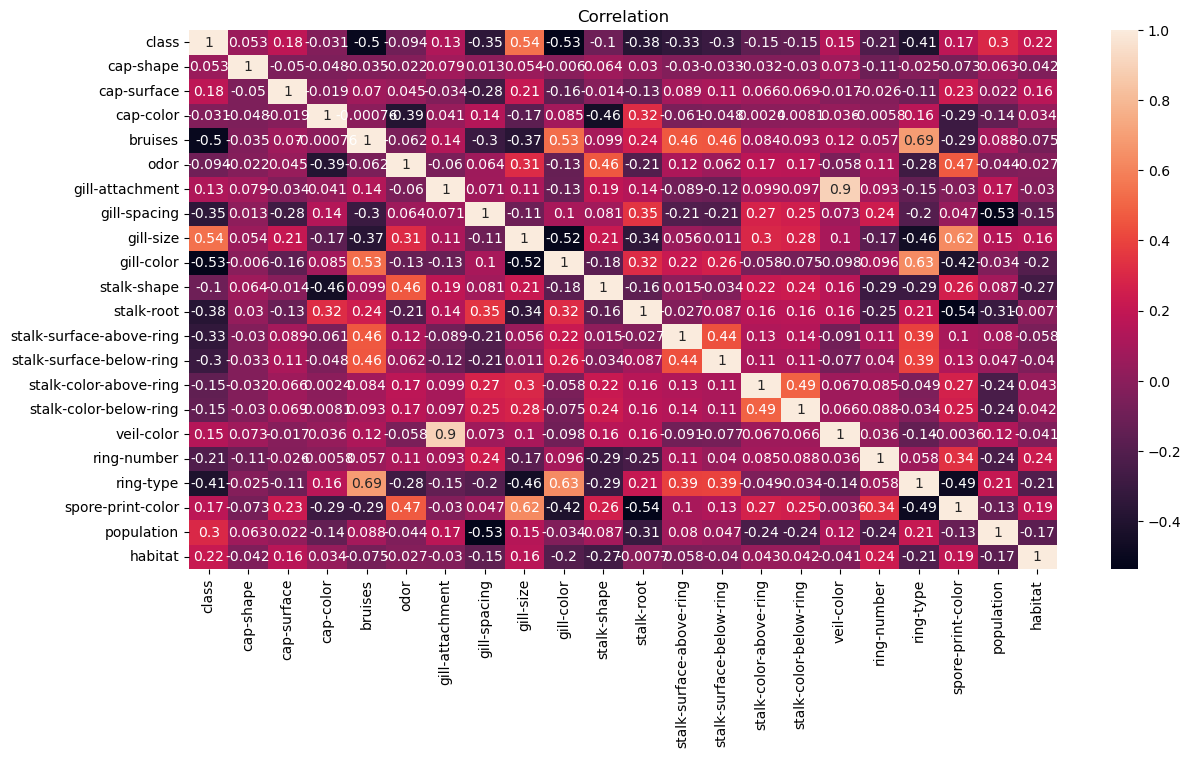

In [19]:
plt.figure(figsize=(14,7))
sns.heatmap(EDA_data.corr(numeric_only=True), annot=True)
plt.title('Correlation')
plt.show()

In [20]:
selected_features = []
for column_name in EDA_data.columns:
    if EDA_data.corr().loc[column_name]['class'] >= 0.17 or EDA_data.corr().loc[column_name]['class'] <= -0.17:
        selected_features.append(column_name)

print(selected_features)

['class', 'cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [21]:
data_req = EDA_data[selected_features]
data_req.head()

class  cap-surface  bruises  gill-spacing  gill-size  gill-color  \
0      1            2        1             0          1           4   
1      0            2        1             0          0           4   
2      0            2        1             0          0           5   
3      1            3        1             0          1           5   
4      0            2        0             1          0           4   

   stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  \
0           3                         2                         2   
1           2                         2                         2   
2           2                         2                         2   
3           3                         2                         2   
4           3                         2                         2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1

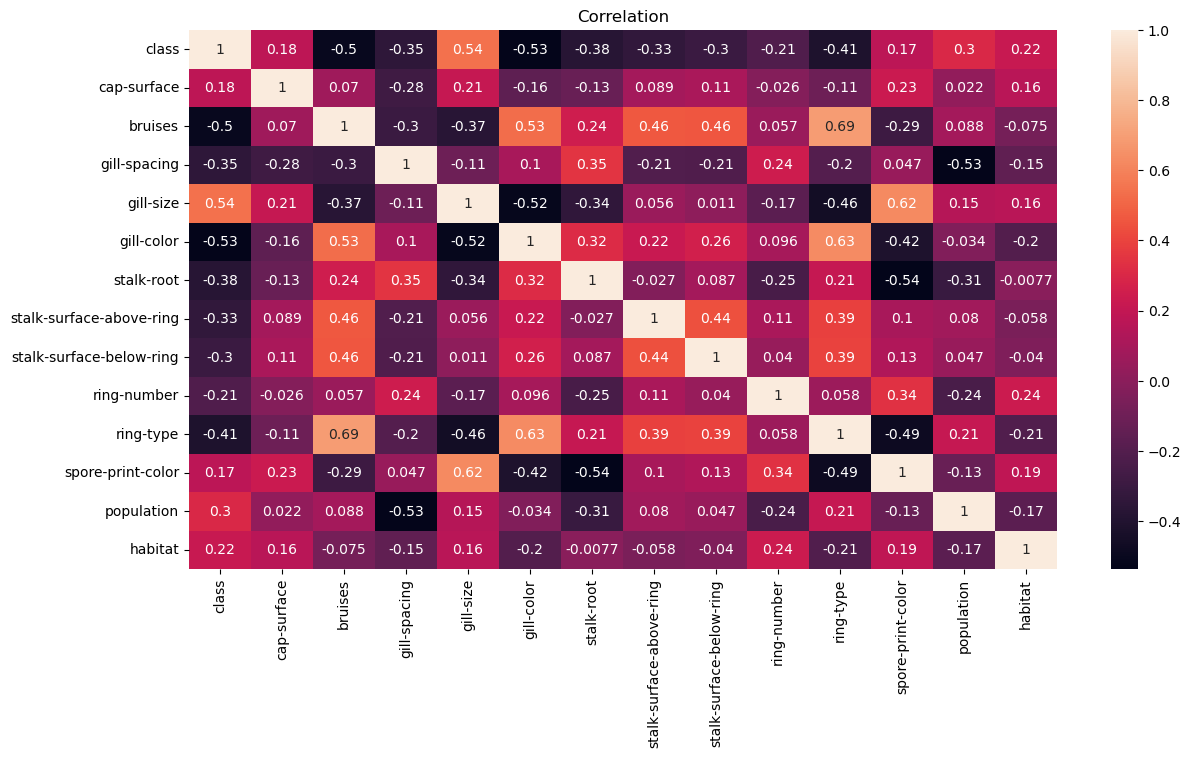

In [22]:
plt.figure(figsize=(14,7))
sns.heatmap(data_req.corr(), annot=True)
plt.title('Correlation')
plt.show()

# Encoding

Transform categorical data into binary values

1. For values that have no more than 2 possible values we apply `LabelEncoder` function

In [23]:
data = data[selected_features]

for column in data.columns:
    if len(data[column].value_counts()) == 2:
        data[column] = LabelEncoder().fit_transform(data[column]) 
    
data.head()

class cap-surface  bruises  gill-spacing  gill-size gill-color stalk-root  \
0      1           s        1             0          1          k          e   
1      0           s        1             0          0          k          c   
2      0           s        1             0          0          n          c   
3      1           y        1             0          1          n          e   
4      0           s        0             1          0          k          e   

  stalk-surface-above-ring stalk-surface-below-ring ring-number ring-type  \
0                        s                        s           o         p   
1                        s                        s           o         p   
2                        s                        s           o         p   
3                        s                        s           o         p   
4                        s                        s           o         e   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g  
2                 n          n       m  
3                 k          s       u  
4                 n          a       g

2. For values that have more than 2 possible values we apply `one-hot-encode` tecnique

In [24]:
data = pd.get_dummies(data)

data.head()

class  bruises  gill-spacing  gill-size  cap-surface_f  cap-surface_g  \
0      1        1             0          1              0              0   
1      0        1             0          0              0              0   
2      0        1             0          0              0              0   
3      1        1             0          1              0              0   
4      0        0             1          0              0              0   

   cap-surface_s  cap-surface_y  gill-color_b  gill-color_e  ...  \
0              1              0             0             0  ...   
1              1              0             0             0  ...   
2              1              0             0             0  ...   
3              0              1             0             0  ...   
4              1              0             0             0  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 63 columns]

## Create Unlabel Data

The 'class' column contains our labels, so we proceed to create our new unlabeled data by separating them out

In [25]:
X = data.drop(['class'], axis=1)
y = data['class']

X.head()

bruises  gill-spacing  gill-size  cap-surface_f  cap-surface_g  \
0        1             0          1              0              0   
1        1             0          0              0              0   
2        1             0          0              0              0   
3        1             0          1              0              0   
4        0             1          0              0              0   

   cap-surface_s  cap-surface_y  gill-color_b  gill-color_e  gill-color_g  \
0              1              0             0             0             0   
1              1              0             0             0             0   
2              1              0             0             0             0   
3              0              1             0             0             0   
4              1              0             0             0             0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  

[5 rows x 62 columns]

In [26]:
print(X.shape)
print(y.shape)

(8124, 62)
(8124,)


In [27]:
X.describe()

bruises  gill-spacing    gill-size  cap-surface_f  cap-surface_g  \
count  8124.000000   8124.000000  8124.000000    8124.000000    8124.000000   
mean      0.415559      0.161497     0.309207       0.285574       0.000492   
std       0.492848      0.368011     0.462195       0.451715       0.022185   
min       0.000000      0.000000     0.000000       0.000000       0.000000   
25%       0.000000      0.000000     0.000000       0.000000       0.000000   
50%       0.000000      0.000000     0.000000       0.000000       0.000000   
75%       1.000000      0.000000     1.000000       1.000000       0.000000   
max       1.000000      1.000000     1.000000       1.000000       1.000000   

       cap-surface_s  cap-surface_y  gill-color_b  gill-color_e  gill-color_g  \
count    8124.000000    8124.000000   8124.000000   8124.000000   8124.000000   
mean        0.314623       0.399311      0.212703      0.011817      0.092565   
std         0.464394       0.489787      0.409245      0.108068      0.289840   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000      0.000000   
75%         1.000000       1.000000      0.000000      0.000000      0.000000   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

       ...  population_s  population_v  population_y    habitat_d  \
count  ...   8124.000000   8124.000000   8124.000000  8124.000000   
mean   ...      0.153619      0.497292      0.210734     0.387494   
std    ...      0.360605      0.500023      0.407855     0.487208   
min    ...      0.000000      0.000000      0.000000     0.000000   
25%    ...      0.000000      0.000000      0.000000     0.000000   
50%    ...      0.000000      0.000000      0.000000     0.000000   
75%    ...      0.000000      1.000000      0.000000     1.000000   
max    ...      1.000000      1.000000      1.000000     1.000000   

         habitat_g    habitat_l    habitat_m    habitat_p    habitat_u  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.264402     0.102413     0.035943     0.140817     0.045298   
std       0.441041     0.303209     0.186159     0.347854     0.207969   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         habitat_w  
count  8124.000000  
mean      0.023634  
std       0.151914  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 62 columns]

### Pre - training

Scaling down the values using Standard Scaler

In [28]:
scaler=StandardScaler()
X_standardized_data = scaler.fit_transform(X)
X_standardized_data[:1]

array([[ 1.18591657, -0.43886364,  1.49468272, -0.63223756, -0.02219484,
         1.47594165, -0.81532454, -0.5197777 , -0.10935331, -0.31938628,
        -0.31468393,  4.34876588, -0.38484578, -0.08910918, -0.47430986,
        -0.05443311, -0.25390039, -0.41671241, -0.10343684, -0.66287606,
        -0.93190411, -0.27104839,  2.50071418, -0.15558197, -0.27000029,
        -0.64216688,  0.75468654, -0.05443311, -0.28239125, -0.62918701,
         0.80365857, -0.19032732, -0.0667161 ,  0.29143764, -0.28239125,
        -0.7204669 , -0.07709433, -0.43566808, -0.0667161 ,  1.02341538,
        -0.07709433, -0.50138441,  1.82749654, -0.56540968, -0.07709433,
        -0.0945615 , -0.07709433, -0.64522709, -0.07709433, -0.22273842,
        -0.20899603, -0.22756678,  2.34725699, -0.99459854, -0.51671982,
        -0.7953846 , -0.59953128, -0.33778342, -0.19308791, -0.40484176,
         4.59086996, -0.15558197]])

Splitting the training dataset into X_train, X_test, y_train and y_test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized_data, y, test_size=0.2, random_state=42)

# Clustering (K-means)

In [30]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [31]:
kmeans.fit(X_train)

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

In [32]:
clusters = kmeans.fit_predict(X)
clusters.shape

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(8124,)

In [33]:
X['cluster'] = clusters
X.head()

bruises  gill-spacing  gill-size  cap-surface_f  cap-surface_g  \
0        1             0          1              0              0   
1        1             0          0              0              0   
2        1             0          0              0              0   
3        1             0          1              0              0   
4        0             1          0              0              0   

   cap-surface_s  cap-surface_y  gill-color_b  gill-color_e  gill-color_g  \
0              1              0             0             0             0   
1              1              0             0             0             0   
2              1              0             0             0             0   
3              0              1             0             0             0   
4              1              0             0             0             0   

   ...  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0  ...             0             0          0          0          0   
1  ...             0             0          0          1          0   
2  ...             0             0          0          0          0   
3  ...             0             0          0          0          0   
4  ...             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  cluster  
0          0          0          1          0        0  
1          0          0          0          0        0  
2          1          0          0          0        0  
3          0          0          1          0        0  
4          0          0          0          0        0  

[5 rows x 63 columns]

In [34]:
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [35]:
X['cluster'].value_counts()

0    4856
1    3268
Name: cluster, dtype: int64

In [36]:
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_avg

0.21737873972941768

PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers.

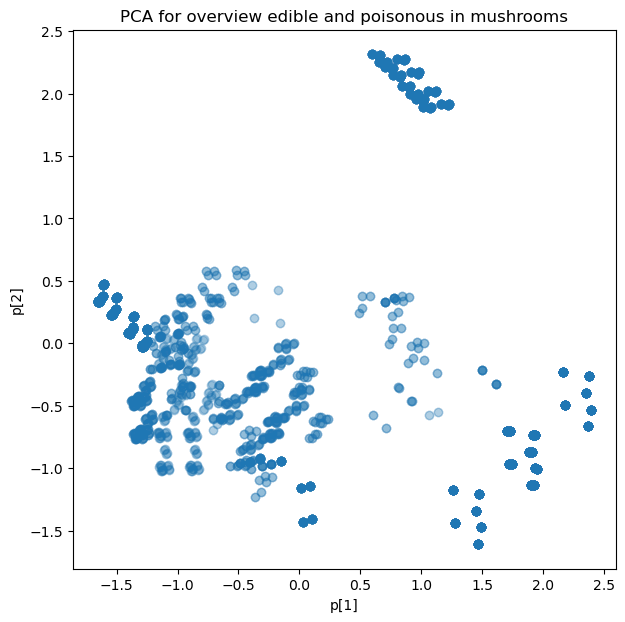

In [37]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(X)

plt.figure(figsize = (7,7))
plt.scatter(x_2d[:,0],x_2d[:,1], alpha=0.1)
plt.title('PCA for overview edible and poisonous in mushrooms')
plt.xlabel('p[1]')
plt.ylabel('p[2]')
plt.show()

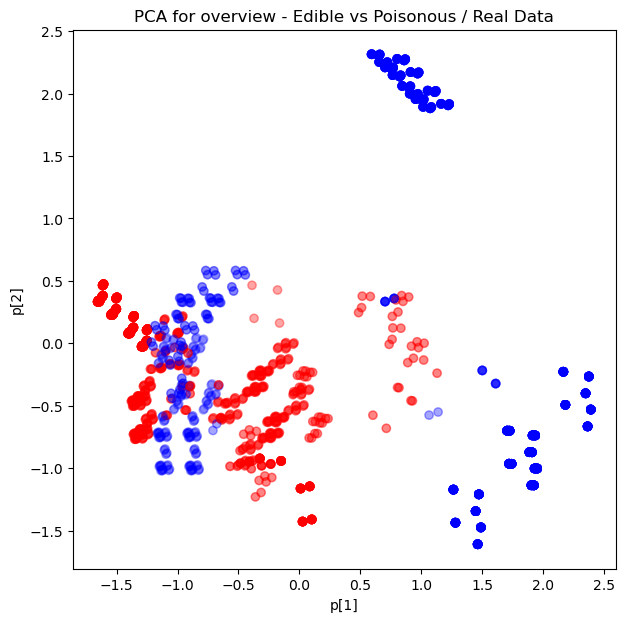

In [38]:
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'blue'}

label_color = [LABEL_COLOR_MAP[l] for l in data['class']]
plt.figure(figsize = (7,7))
plt.scatter(x_2d[:,0],x_2d[:,1], c= label_color, alpha=0.1)
plt.title('PCA for overview - Edible vs Poisonous / Real Data')
plt.xlabel('p[1]')
plt.ylabel('p[2]')
plt.show()

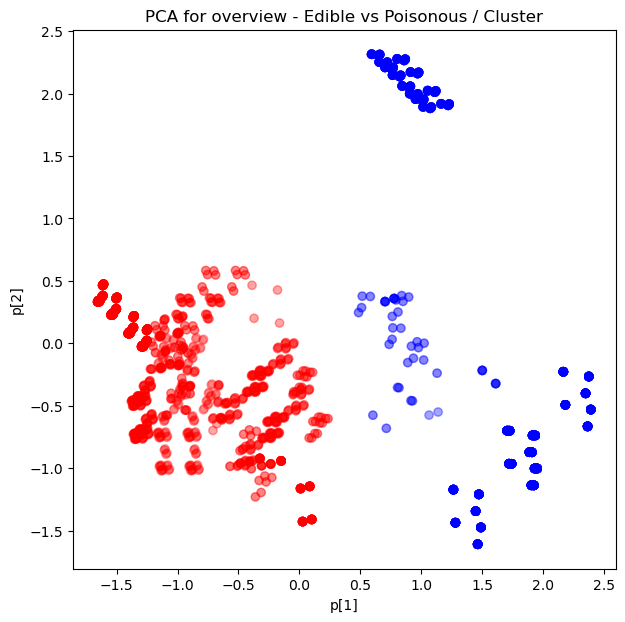

In [39]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X['cluster']]
plt.figure(figsize = (7,7))
plt.scatter(x_2d[:,0],x_2d[:,1], c= label_color, alpha=0.1)
plt.title('PCA for overview - Edible vs Poisonous / Cluster')
plt.xlabel('p[1]')
plt.ylabel('p[2]')
plt.show()

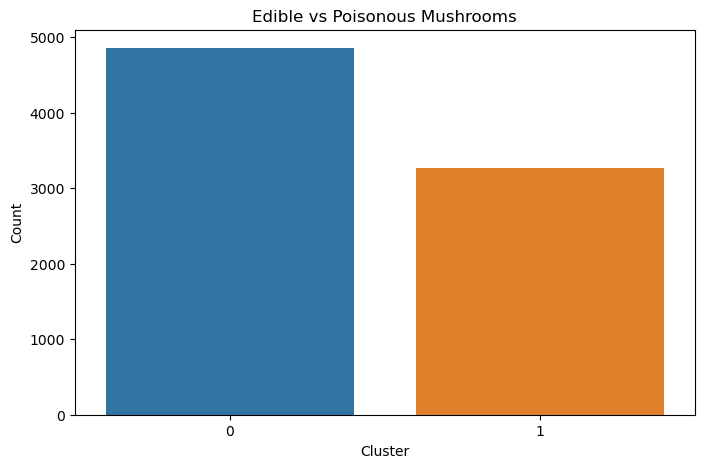

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x=X['cluster'].value_counts().index, y=X['cluster'].value_counts().values)
plt.title('Edible vs Poisonous Mushrooms')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.

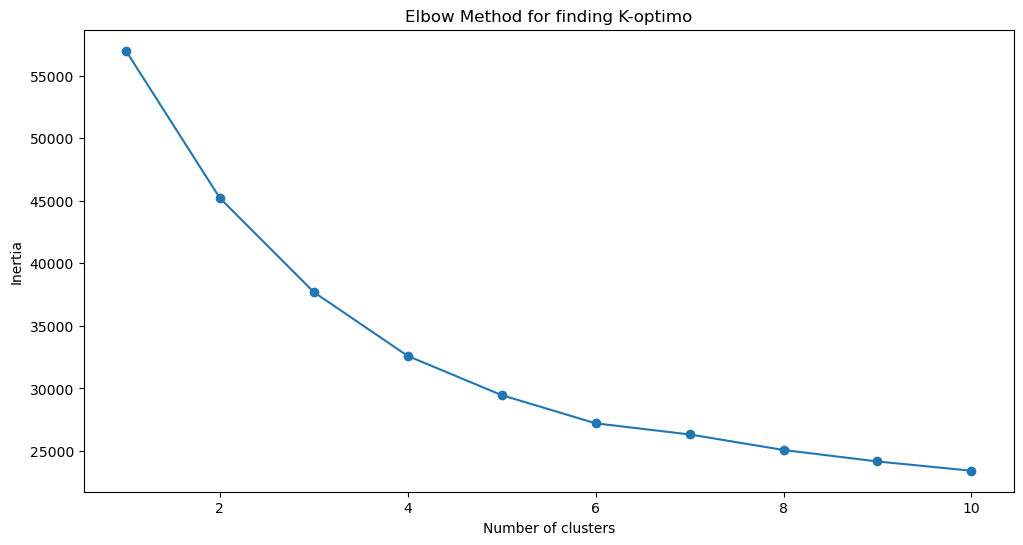

In [41]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for finding K-optimo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [42]:
k_optimo = 4
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=0)
k_clusters = kmeans_optimo.fit_predict(X)

silhouette_avg = silhouette_score(X, k_clusters)
silhouette_avg

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.3001542230896943

# Classification (Decision Tree)

## Training and Testing Model

The 'cluster' column contains our labels, so we proceed to create our new unlabeled data by separating them out

In [43]:
X_uncluster = X.drop(['cluster'], axis=1)
y_cluster = X['cluster']

X_uncluster.head()

bruises  gill-spacing  gill-size  cap-surface_f  cap-surface_g  \
0        1             0          1              0              0   
1        1             0          0              0              0   
2        1             0          0              0              0   
3        1             0          1              0              0   
4        0             1          0              0              0   

   cap-surface_s  cap-surface_y  gill-color_b  gill-color_e  gill-color_g  \
0              1              0             0             0             0   
1              1              0             0             0             0   
2              1              0             0             0             0   
3              0              1             0             0             0   
4              1              0             0             0             0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  

[5 rows x 62 columns]

Splitting the training dataset into X_train, X_test, y_train and y_test

In [44]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_uncluster, y_cluster, test_size=0.2, random_state=42)

Initiate the decision tree model and fit into the training data

In [45]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_cl, y_train_cl)

DecisionTreeClassifier()

Save predicted data

In [46]:
y_pred = decision_tree.predict(X_test_cl)

Evaluate the model performance on the training data

In [48]:
print('Accuracy: ', accuracy_score(data['class'][:1625], y_pred))
print('\n' + classification_report(data['class'][:1625], y_pred))

Accuracy:  0.5747692307692308

              precision    recall  f1-score   support

           0       0.88      0.60      0.71      1432
           1       0.12      0.39      0.18       193

    accuracy                           0.57      1625
   macro avg       0.50      0.50      0.45      1625
weighted avg       0.79      0.57      0.65      1625



In [49]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('\n' + classification_report(y_test, y_pred))

Accuracy:  0.8732307692307693

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       843
           1       0.94      0.78      0.86       782

    accuracy                           0.87      1625
   macro avg       0.88      0.87      0.87      1625
weighted avg       0.88      0.87      0.87      1625



## Utilization of Analysis Results

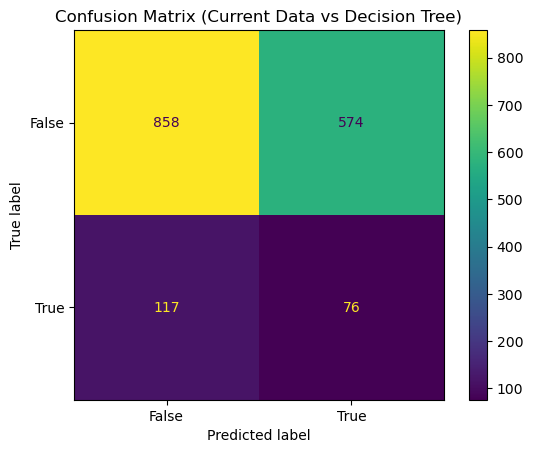

In [51]:
confusion_matrix2 = metrics.confusion_matrix(data['class'][:1625], y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix (Current Data vs Decision Tree)')
plt.show()

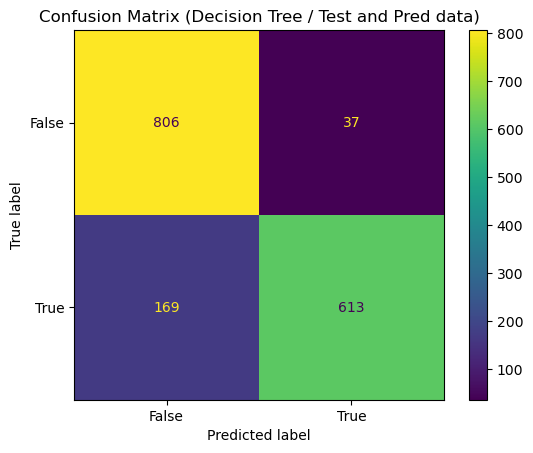

In [52]:
confusion_matrix3 = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix (Decision Tree / Test and Pred data)')
plt.show()